In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

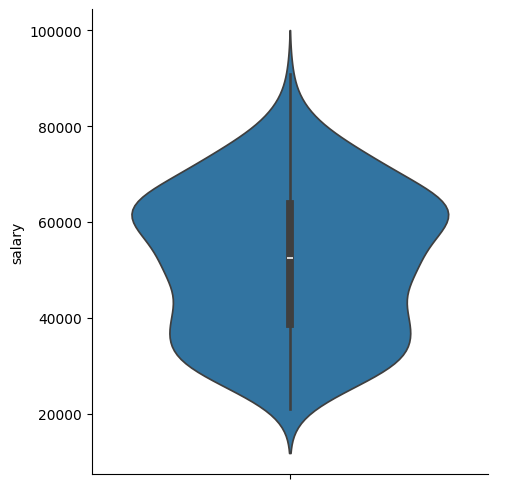

In [15]:
data = pd.read_csv('light_logistic_dataset.csv')
sns.catplot( data , y = 'salary' , kind = 'violin')

In [16]:
data

,age,experience,education,city_size,skill_score,projects_completed,last_appraisal,salary,promoted
0,58,35,Bachelors,Small,95.2,15,4,71201,1
1,48,25,HighSchool,Medium,89.1,15,3,65102,1
2,34,13,HighSchool,Small,59.0,9,3,41483,1
3,27,5,HighSchool,Small,67.2,0,4,38200,1
4,40,19,Bachelors,Small,75.4,10,4,50589,1
...,...,...,...,...,...,...,...,...,...
395,48,24,Bachelors,Large,56.4,14,3,53174,1
396,33,9,Bachelors,Large,69.3,6,3,43765,1
397,47,25,HighSchool,Medium,64.7,10,3,50774,1
398,24,2,HighSchool,Small,54.7,2,2,22883,0


In [17]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy
from sklearn.preprocessing import StandardScaler # for scaling the model


In [18]:
data2 = pd.get_dummies(data, columns=['education','city_size'], drop_first=True)


In [19]:
df = data2
df = df.apply(lambda x: x.astype(int) if x.dtypes == bool else x)


In [20]:
X = data2.drop('promoted', axis=1)
y = data2['promoted']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 10)
(280,)
(120, 10)
(120,)


In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_pred = logreg.predict(X_test)

In [ ]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))
print('The accuracy of Logistic Regression is: ', (metrics.recall_score(y_test, y_pred)))
print('The accuracy of Logistic Regression is: ', (metrics.f1_score(y_test, y_pred)))


The accuracy of Logistic Regression is:  0.8083333333333333
The accuracy of Logistic Regression is:  0.9333333333333333
The accuracy of Logistic Regression is:  0.8795811518324608


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13 17]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.83      0.93      0.88        90

    accuracy                           0.81       120
   macro avg       0.76      0.68      0.71       120
weighted avg       0.79      0.81      0.79       120

